In [2]:
import pandas as pd

# Load the dataset
file_path = 'Debernardi et al 2020 data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and the summary of the dataset
data.head(), data.describe()


(  sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
 0        S1        Cohort1          BPTB   33   F          1   NaN   
 1       S10        Cohort1          BPTB   81   F          1   NaN   
 2      S100        Cohort2          BPTB   51   M          1   NaN   
 3      S101        Cohort2          BPTB   61   M          1   NaN   
 4      S102        Cohort2          BPTB   62   M          1   NaN   
 
   benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
 0                     NaN           11.7     1.83222  0.893219   52.94884   
 1                     NaN            NaN     0.97266  2.037585   94.46703   
 2                     NaN            7.0     0.78039  0.145589  102.36600   
 3                     NaN            8.0     0.70122  0.002805   60.57900   
 4                     NaN            9.0     0.21489  0.000860   65.54000   
 
          TFF1     REG1A  
 0  654.282174  1262.000  
 1  209.488250   228.407  
 2  461.141000       

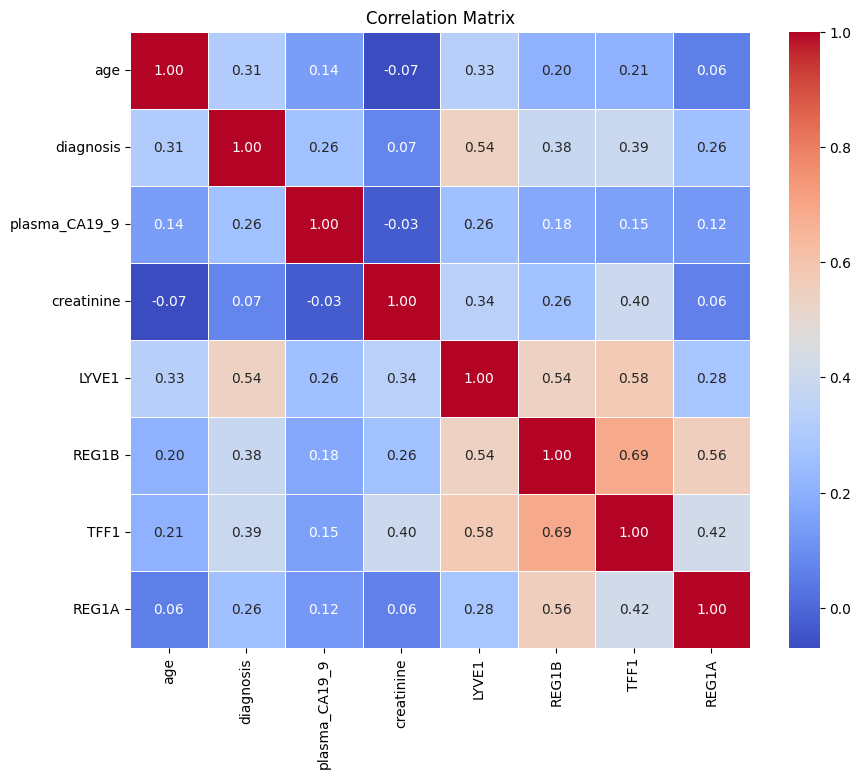

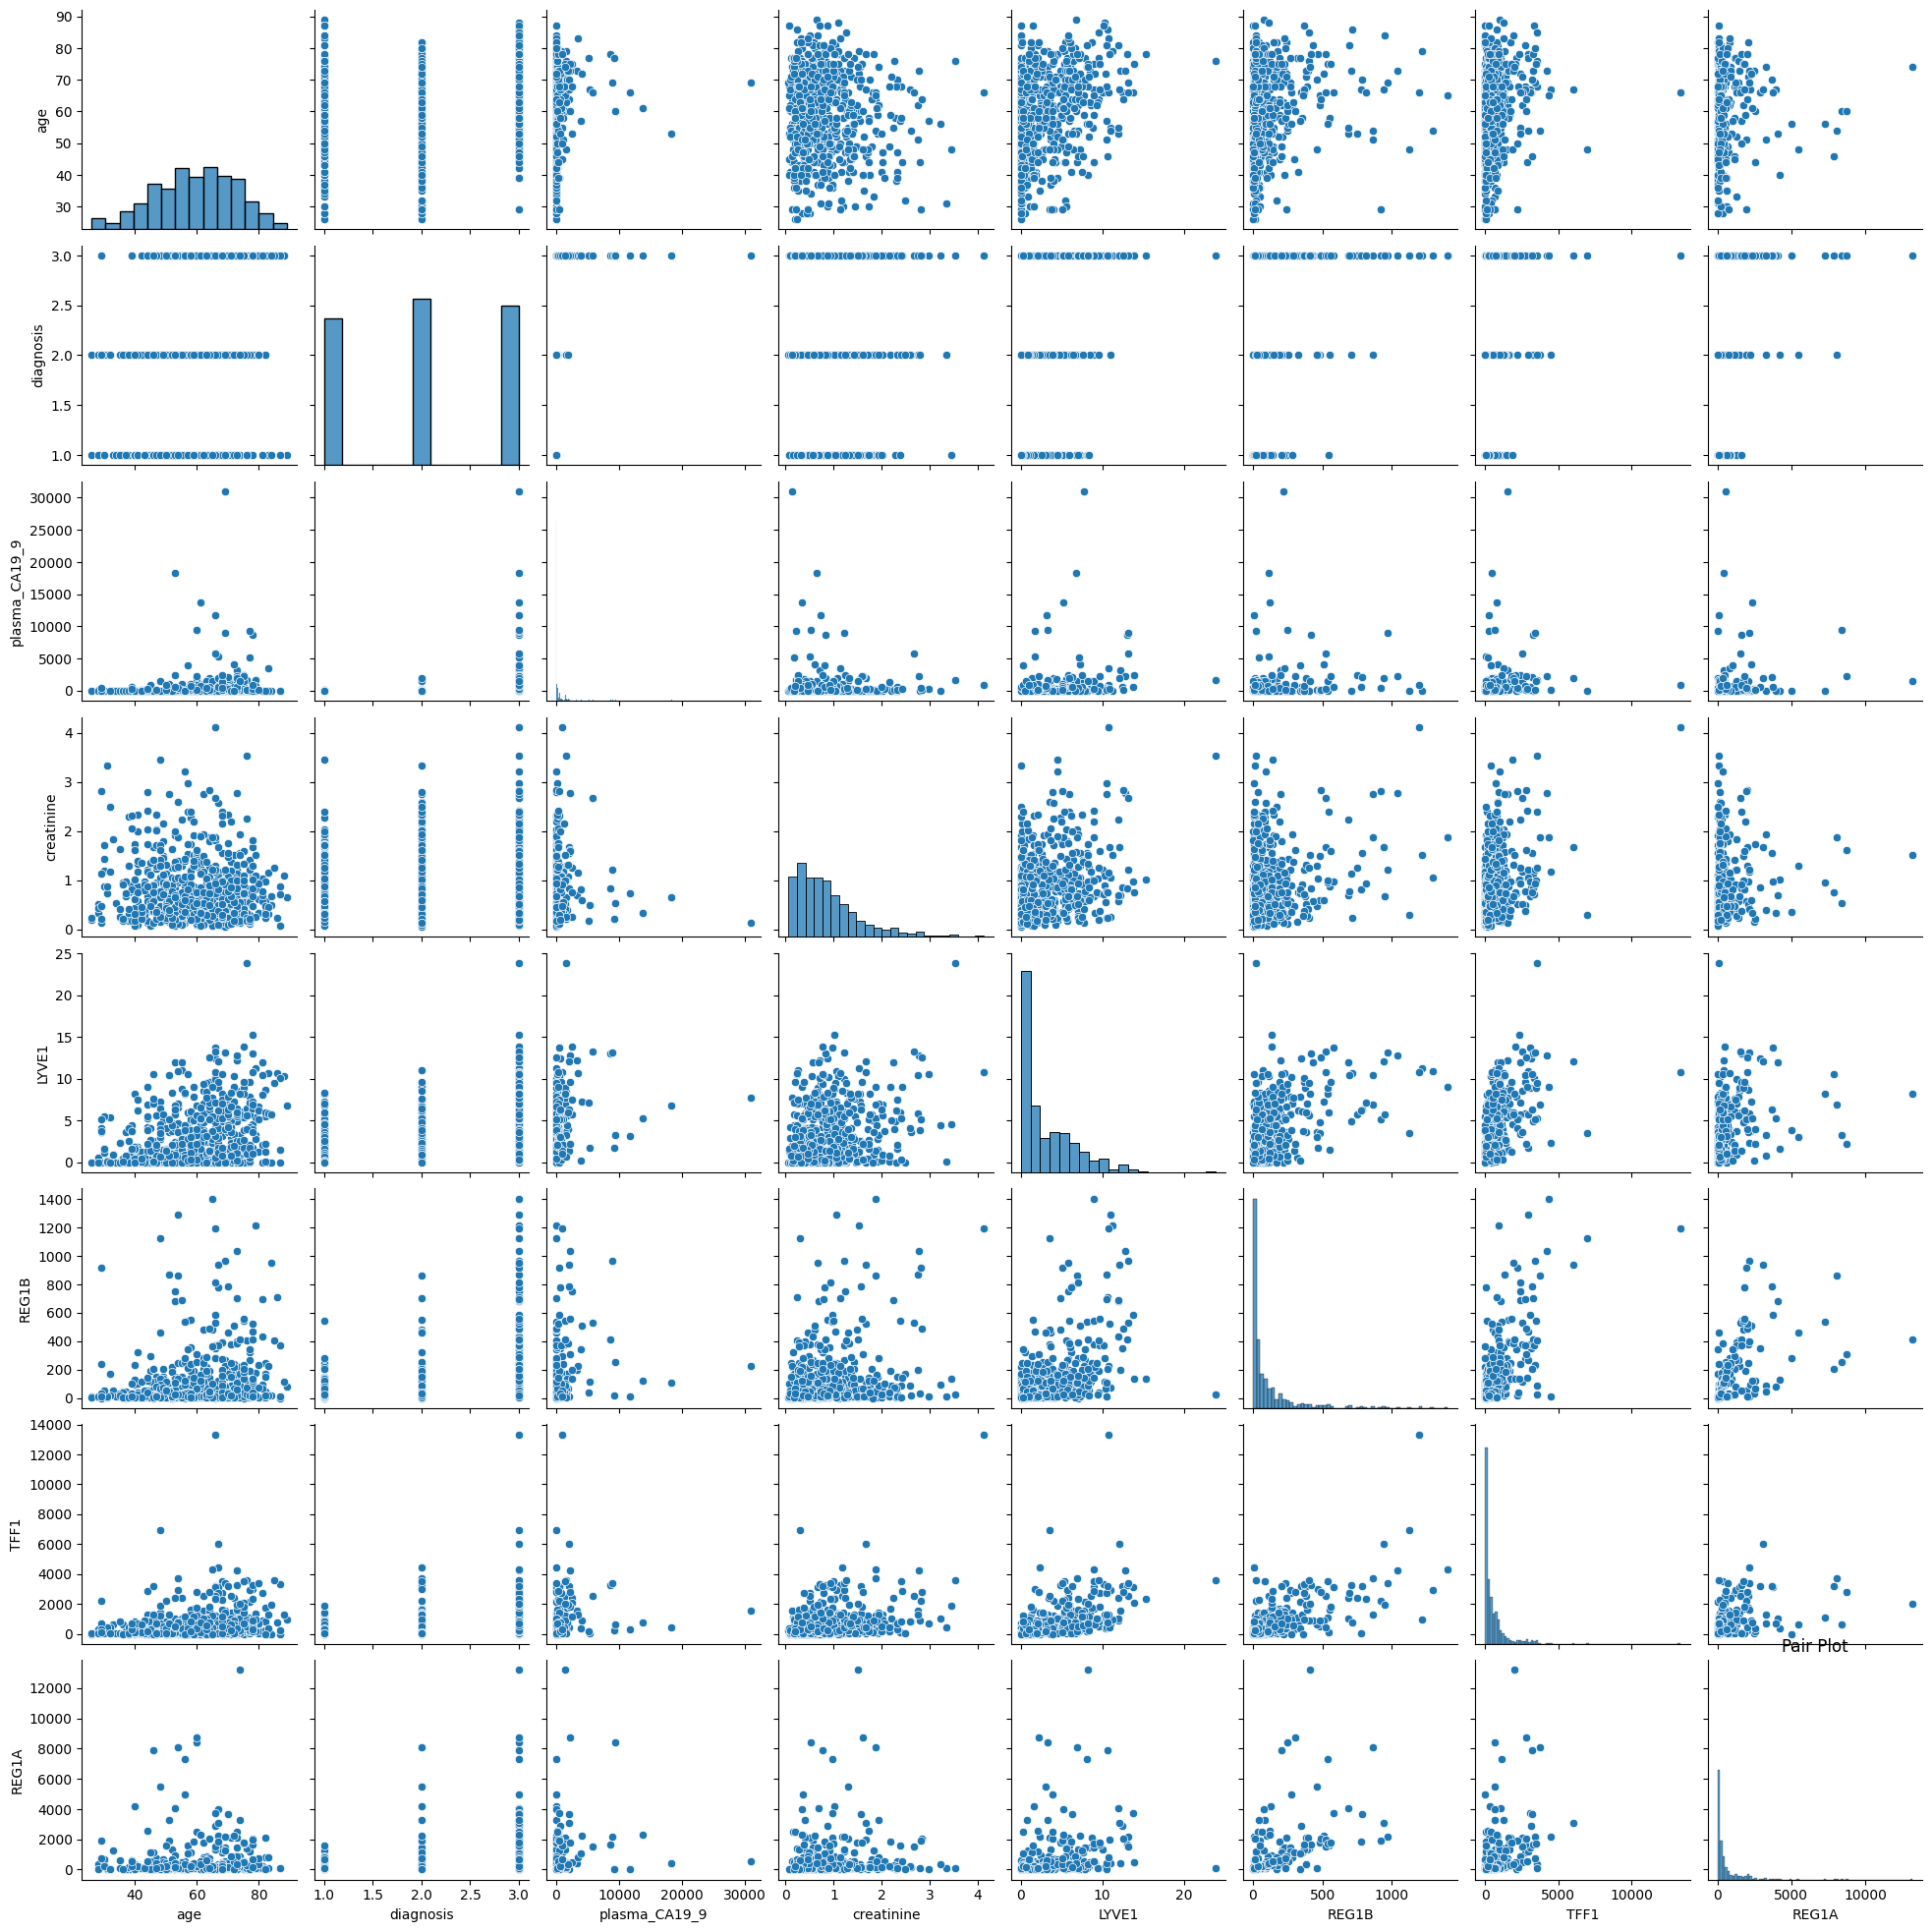

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Debernardi et al 2020 data.csv'
data = pd.read_csv(file_path)

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pair plot
sns.pairplot(numeric_data)
plt.title('Pair Plot')
plt.show()


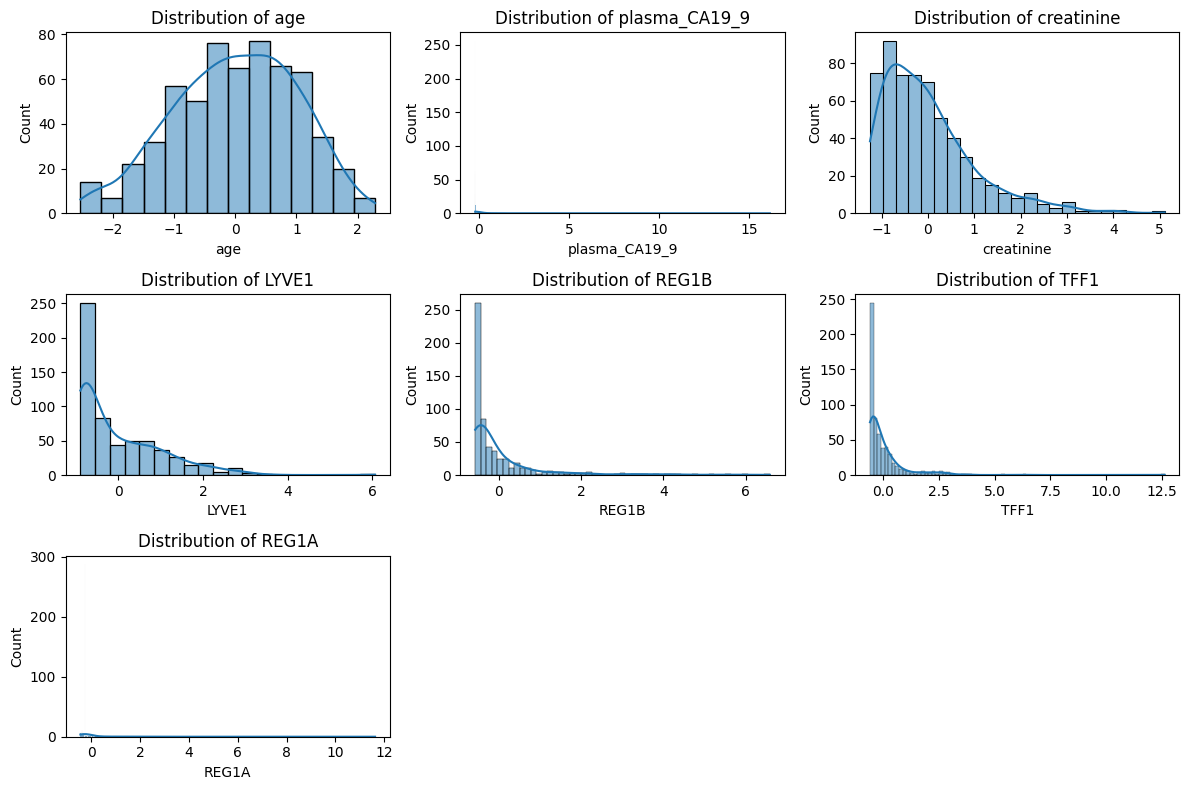

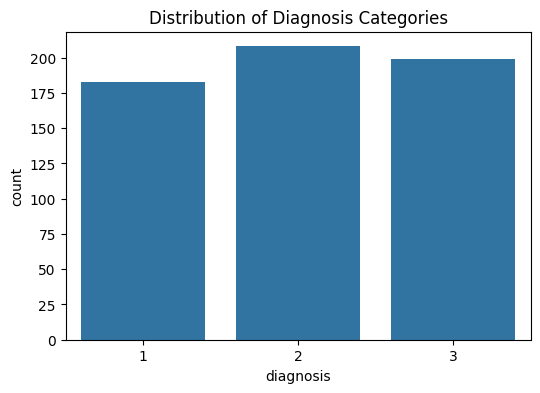

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Debernardi et al 2020 data.csv'
data = pd.read_csv(file_path)

# Handle missing values
# Filling missing values for biomarkers with the median
for column in ['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']:
    data[column].fillna(data[column].median(), inplace=True)

# Drop rows where 'diagnosis' is missing (if any)
data.dropna(subset=['diagnosis'], inplace=True)

# Encoding categorical data
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])  # Convert sex to 0 and 1

# Standardize the data
scaler = StandardScaler()
numerical_cols = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Visualization of biomarker distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualization of diagnosis categories
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis Categories')
plt.show()


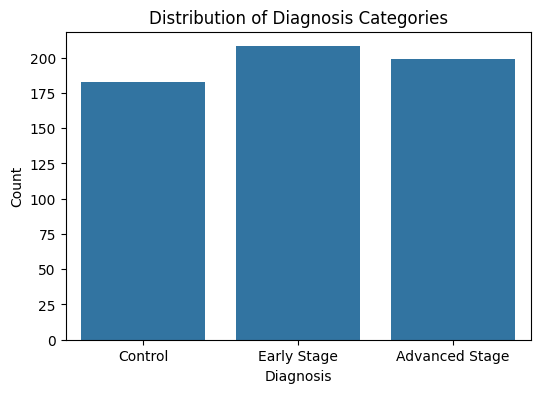

Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.73      0.75        41
           2       0.64      0.54      0.58        39
           3       0.78      0.95      0.86        38

    accuracy                           0.74       118
   macro avg       0.73      0.74      0.73       118
weighted avg       0.73      0.74      0.73       118

Confusion Matrix:
 [[30 10  1]
 [ 9 21  9]
 [ 0  2 36]]


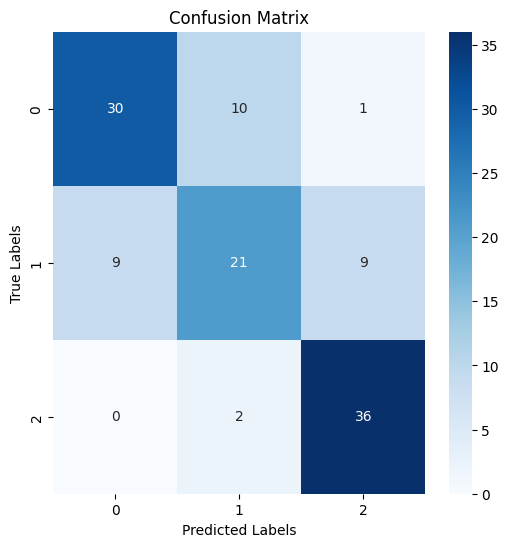

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the dataset
# file_path = '/mnt/data/Debernardi et al 2020 data.csv'
# data = pd.read_csv(file_path)

# Handling missing values and encoding
data['plasma_CA19_9'].fillna(data['plasma_CA19_9'].median(), inplace=True)
data.dropna(subset=['diagnosis'], inplace=True)  # Assuming 'diagnosis' is crucial
data['sex'] = LabelEncoder().fit_transform(data['sex'])

# Standardizing the numerical columns
features = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']
data[features] = StandardScaler().fit_transform(data[features])

# Assuming diagnosis names (please update these based on actual data)
diagnosis_labels = {1: 'Control', 2: 'Early Stage', 3: 'Advanced Stage'}
data['diagnosis_label'] = data['diagnosis'].map(diagnosis_labels)

# Visualization of diagnosis categories
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis_label', data=data)
plt.title('Distribution of Diagnosis Categories')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Data split
X = data[features]
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Cell 1: Data Preprocessing Adjusted

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load data
file_path = 'Debernardi et al 2020 data.csv'
data = pd.read_csv(file_path)

# Identify numeric columns to calculate the median
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Fill missing values for numeric columns only
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Encode categorical data - assuming 'sex' is the only non-numeric categorical variable that needs encoding
if 'sex' in data.columns:
    data['sex'] = LabelEncoder().fit_transform(data['sex'])

# Features and Target
features = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'sex']
features = [f for f in features if f in data.columns]  # Ensure only columns present are used
X = data[features]
y = data['diagnosis']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Cell 2: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction and Evaluation
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print(f"Random Forest - Accuracy: {rf_accuracy}")
print(f"Random Forest - Classification Report:\n{rf_class_report}")


Random Forest - Accuracy: 0.7203389830508474
Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.71      0.72        41
           2       0.59      0.56      0.58        39
           3       0.83      0.89      0.86        38

    accuracy                           0.72       118
   macro avg       0.72      0.72      0.72       118
weighted avg       0.72      0.72      0.72       118



In [ ]:
# Cell 3: Support Vector Machine

from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prediction and Evaluation
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_class_report = classification_report(y_test, svm_predictions)

print(f"SVM - Accuracy: {svm_accuracy}")
print(f"SVM - Classification Report:\n{svm_class_report}")


SVM - Accuracy: 0.635593220338983
SVM - Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.51      0.59        41
           2       0.49      0.54      0.51        39
           3       0.73      0.87      0.80        38

    accuracy                           0.64       118
   macro avg       0.64      0.64      0.63       118
weighted avg       0.64      0.64      0.63       118



In [ ]:
# Cell 4: Logistic Regression

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Prediction and Evaluation
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_class_report = classification_report(y_test, lr_predictions)

print(f"Logistic Regression - Accuracy: {lr_accuracy}")
print(f"Logistic Regression - Classification Report:\n{lr_class_report}")


Logistic Regression - Accuracy: 0.652542372881356
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.63      0.66        41
           2       0.52      0.44      0.47        39
           3       0.72      0.89      0.80        38

    accuracy                           0.65       118
   macro avg       0.64      0.65      0.64       118
weighted avg       0.64      0.65      0.64       118



In [ ]:
pip install xgboost


In [ ]:
# Cell for XGBoost Classifier with adjusted labels

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess data
file_path = 'Debernardi et al 2020 data.csv'
data = pd.read_csv(file_path)

# Handling missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Encode categorical data and adjust labels
data['sex'] = LabelEncoder().fit_transform(data['sex'])
y = data['diagnosis'] - 1  # Adjust labels to start at 0

# Features list and data standardization
features = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'sex']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Prediction and Evaluation
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_class_report = classification_report(y_test, xgb_predictions)

print(f"XGBoost - Accuracy: {xgb_accuracy}")
print(f"XGBoost - Classification Report:\n{xgb_class_report}")


XGBoost - Accuracy: 0.7542372881355932
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.66      0.59      0.62        39
           2       0.80      0.87      0.84        38

    accuracy                           0.75       118
   macro avg       0.75      0.75      0.75       118
weighted avg       0.75      0.75      0.75       118



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Example: Setting up a simple XGBoost classifier and tuning with GridSearchCV
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_  # This will be your optimized model


Accuracy: 0.7542372881355932
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.67      0.56      0.61        39
           2       0.77      0.87      0.81        38

    accuracy                           0.75       118
   macro avg       0.75      0.75      0.75       118
weighted avg       0.75      0.75      0.75       118



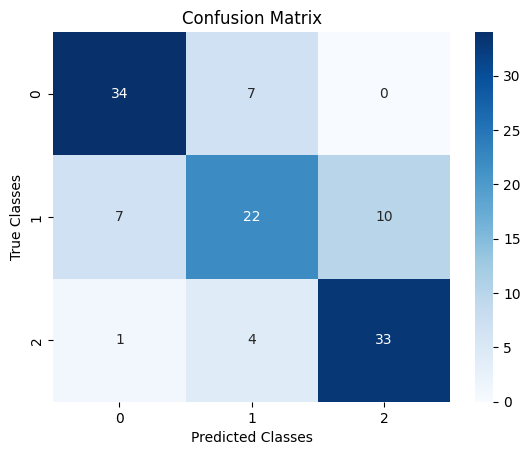

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
predictions = best_xgb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Classification Report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Setup a Voting Classifier
logreg = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('lr', logreg), ('svc', svc)],
    voting='soft'
)

# Fit the model
voting_clf.fit(X_train, y_train)

# Evaluation
voting_predictions = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier - Accuracy: {voting_accuracy}")


Voting Classifier - Accuracy: 0.7457627118644068


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.8s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END 

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

xgb_model.fit(X_resampled, y_resampled)
predictions = xgb_model.predict(X_test)
print("Accuracy after SMOTE:", accuracy_score(y_test, predictions))


Accuracy after SMOTE: 0.7457627118644068


In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, y_train are already defined and preprocessed as in previous steps

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Reinitialize the XGBoost model with the best hyperparameters (assuming some parameters are known)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=3, learning_rate=0.1, n_estimators=200)
xgb_model.fit(X_resampled, y_resampled)

# Predictions
predictions = xgb_model.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy after SMOTE: {accuracy}")
print("Classification Report after SMOTE:\n", classification_report(y_test, predictions))


Accuracy after SMOTE: 0.7033898305084746
Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76        41
           1       0.59      0.41      0.48        39
           2       0.77      0.87      0.81        38

    accuracy                           0.70       118
   macro avg       0.69      0.70      0.69       118
weighted avg       0.69      0.70      0.69       118



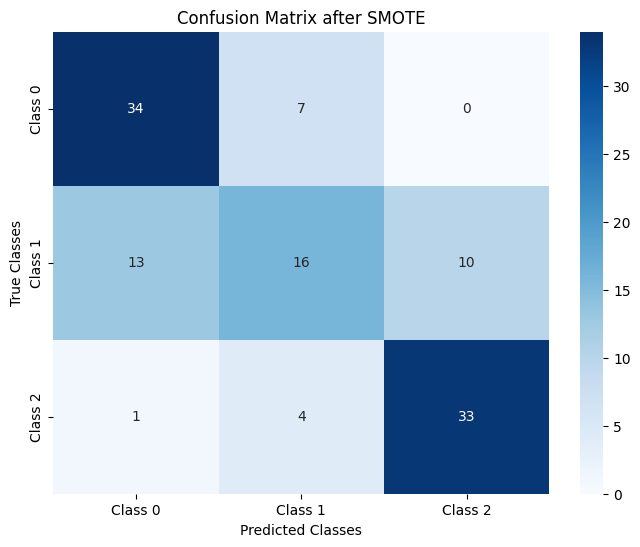

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix after SMOTE')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


In [ ]:
# Assuming you want to check predictions for the first 10 test samples
sample_predictions = xgb_model.predict(X_test[:10])

# Print actual and predicted classes
for i, (actual, predicted) in enumerate(zip(y_test[:10], sample_predictions)):
    print(f"Sample {i}: Actual Class - {actual}, Predicted Class - {predicted}")


Sample 0: Actual Class - 2, Predicted Class - 2
Sample 1: Actual Class - 1, Predicted Class - 0
Sample 2: Actual Class - 2, Predicted Class - 2
Sample 3: Actual Class - 1, Predicted Class - 1
Sample 4: Actual Class - 1, Predicted Class - 1
Sample 5: Actual Class - 0, Predicted Class - 0
Sample 6: Actual Class - 1, Predicted Class - 1
Sample 7: Actual Class - 0, Predicted Class - 0
Sample 8: Actual Class - 2, Predicted Class - 2
Sample 9: Actual Class - 0, Predicted Class - 0


In [1]:
# def get_user_input_and_predict(model, scaler):
#     print("Please enter the patient's data for prediction:")
#     age = float(input("Age: "))  # Assuming 'age' is used in the model
#     plasma_CA19_9 = float(input("Plasma CA19-9 Levels: "))
#     creatinine = float(input("Creatinine Levels: "))
#     LYVE1 = float(input("LYVE1 Levels: "))
#     REG1B = float(input("REG1B Levels: "))
#     TFF1 = float(input("TFF1 Levels: "))
#     REG1A = float(input("REG1A Levels: "))
#     sex = input("Sex (M/F): ")
#     sex = 1 if sex.lower() == 'm' else 0  # Convert sex to numeric

#     # Ensure this list exactly matches the features used during model training
#     user_data = pd.DataFrame([[age, plasma_CA19_9, creatinine, LYVE1, REG1B, TFF1, REG1A, sex]],
#                              columns=['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'sex'])

#     # Scale the data using the same scaler that was used for training
#     user_data_scaled = scaler.transform(user_data)

#     # Predict using the trained model
#     prediction = model.predict(user_data_scaled)
#     return prediction

# # Assuming `model` and `scaler` are already defined:
# # model = your_trained_model
# # scaler = your_predefined_scaler
# predicted_class = get_user_input_and_predict(model, scaler)
# print(f"The predicted class for the input data is: {predicted_class}")
